<a href="https://colab.research.google.com/github/broskunta/PyTorch-Linear-Regression/blob/main/Linear_Regression_1D_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Linear Regression 1D: Training One Parameter

Preparation

In [1]:
# load the libraries

import numpy as np
import matplotlib.pyplot as plt

In [2]:
# The class for plotting

class plot_diagram():

    # Constructor
    def __init__(self, X, Y, w, stop, go = False):
        start = w.data
        self.error = []
        self.parameter = []
        print(type(X.numpy()))
        self.X = X.numpy()

        self.Y = Y.numpy()
        self.parameter_values = torch.arange(start, stop)
        self.Loss_function = [criterion(forward(X), Y) for w.data in self.parameter_values]
        w.data = start

    # Executor
    def __call__(self, Yhat, w, error, n):
        self.error.append(error)
        self.parameter.append(w.data)
        plt.subplot(212)
        plt.plot(self.X, Yhat.detach().numpy())
        plt.plot(self.X, self.Y,'ro')
        plt.xlabel("A")
        plt.ylim(-20, 20)
        plt.subplot(211)
        plt.title("Data Space (top) Estimated Line (bottom) Iteration " + str(n))
        # Convert lists to PyTorch tensors
        parameter_values_tensor = torch.tensor(self.parameter_values)
        loss_function_tensor = torch.tensor(self.Loss_function)

        # Plot using the tensors
        plt.plot(parameter_values_tensor.numpy(), loss_function_tensor.numpy())

        plt.plot(self.parameter, self.error, 'ro')
        plt.xlabel("B")
        plt.figure()

    # Destructor
    def __del__(self):
        plt.close('all')

Makes Data to be used

In [3]:
import torch

In [4]:
# create a line with a slope of -3

x = torch.arange(-3,3,0.1).view(-1,1)
f = -3 * x

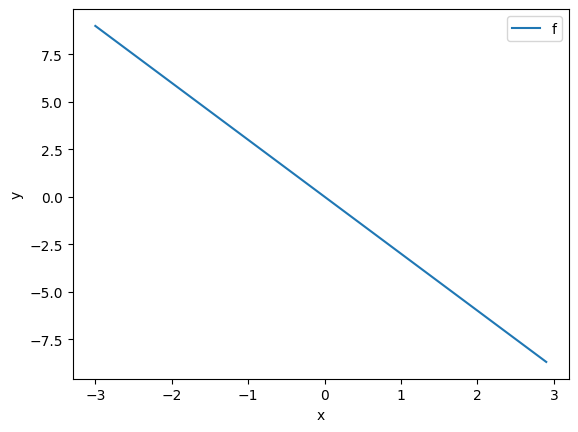

In [5]:
# Plot the line
plt.plot(x.numpy(), f.numpy(), label='f')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

Lets add some noise to simulate real data using the random class

In [7]:
y = f + 0.1 * torch.randn(x.size())

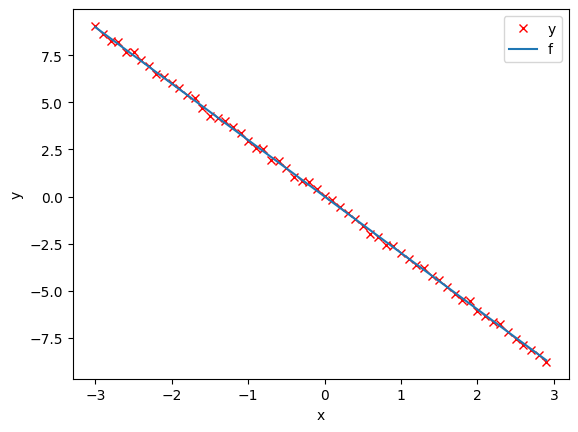

In [8]:
# Plot y
plt.plot(x.numpy(), y.numpy(), 'rx', label='y')

# Plot the line
plt.plot(x.numpy(), f.numpy(), label='f')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

## Create the model and Cost Function

In [10]:
# create the forward fuction for prediction
def forward(x):
  return w * x

In [17]:
# define the cost function, MSE in this case
def criterion(yhat, y):
  return torch.mean((yhat - y) ** 2)

In [25]:
# define the learning rate and the loss. Loss is an eampty list to store the values for
# each iteration
lr = 0.1
LOSS = []

Now, we create a model parameter by setting the argument requires_grad to  True because the system must learn it.

In [13]:
w = torch.tensor(-10.0, requires_grad=True)

Create a plot diagram to visualize the data space

In [18]:
gradient_plot = plot_diagram(x,y,w, stop = 5)

<class 'numpy.ndarray'>


### **Train the Model**

In [30]:
# define a function to train the model

def train_model(iter):
    for epoch in range (iter):

        # make the prediction as we learned in the last lab
        Yhat = forward(x)

        # calculate the iteration
        loss = criterion(Yhat,y)

        # plot the diagram for us to have a better idea
        gradient_plot(Yhat, w, loss.item(), epoch)

        # store the loss into list
        LOSS.append(loss.item())

        # backward pass: compute gradient of the loss with respect to all the learnable parameters
        loss.backward()

        # updata parameters
        w.data = w.data - lr * w.grad.data

        # zero the gradients before running the backward pass
        w.grad.data.zero_()



## Training the model

Lets train for 4 iterations

<ipython-input-2-aed0fd8494ff>:30: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  parameter_values_tensor = torch.tensor(self.parameter_values)


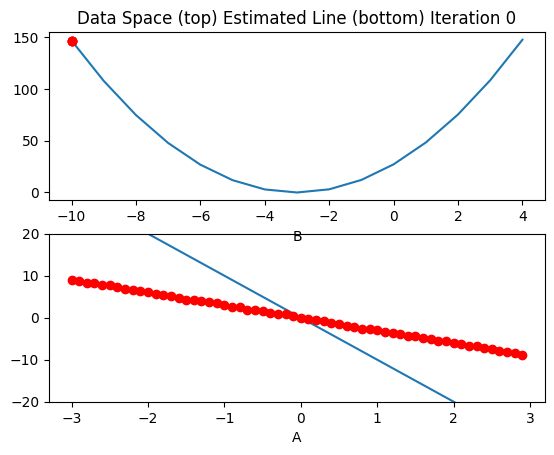

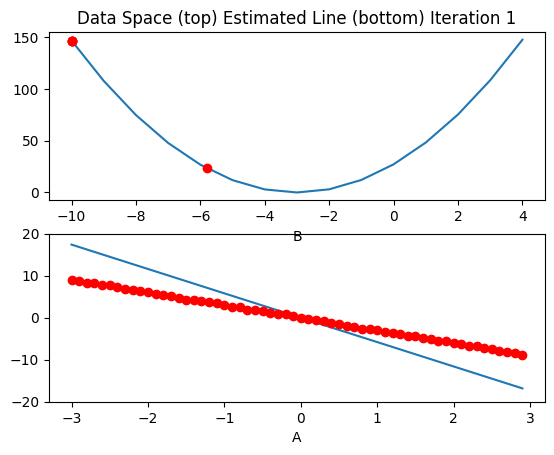

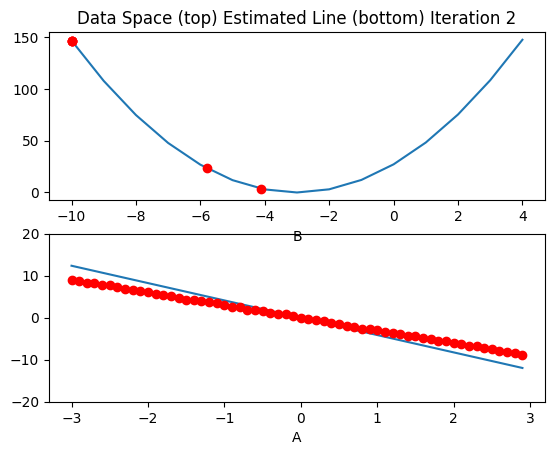

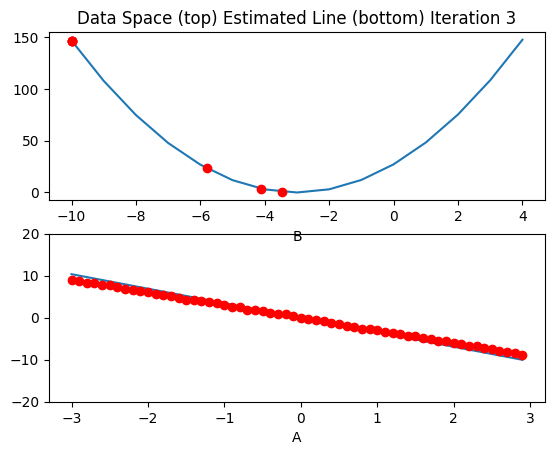

<Figure size 640x480 with 0 Axes>

In [31]:
train_model(4)

Plot the cost for each iteration

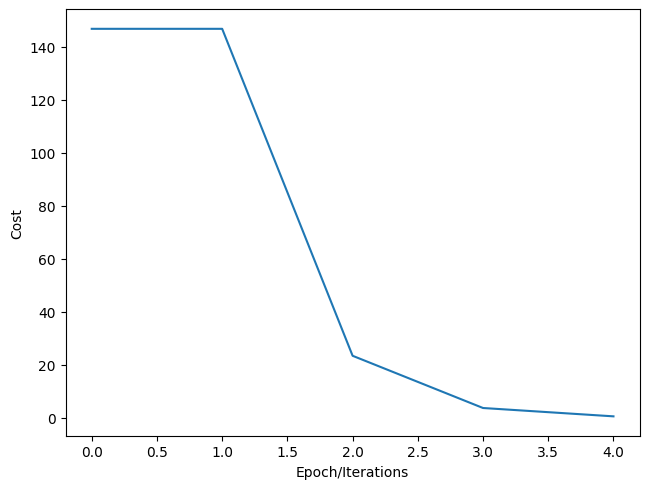

In [32]:
plt.plot(LOSS)
plt.tight_layout()
plt.xlabel('Epoch/Iterations')
plt.ylabel('Cost')
plt.show()

## Practice Section

Create a new w with inital value of -15.0

In [34]:
w = torch.tensor(-15.0, requires_grad=True)

Create an empty list and learning rate


In [35]:
lr = 0.1
LOSS1 = []

Create my own **train_model** function to trains using the loss and run it for 4 iterations.

In [38]:
def my_train_model(iters):
    for epoch in range(iters):

        #make the prediction using the forward
        yhat = forward(x)

        #claculate the iteration
        loss = criterion(yhat, y)

        #plot the diagram
        gradient_plot(yhat,w, loss.item(), epoch)

        # store the loss in to the list
        LOSS1.append(loss.item())

        # backward pass
        loss.backward()

        #update the parameters
        w.data = w.data - lr * w.grad.data

        # zero the gradients
        w.grad.data.zero_()


<ipython-input-2-aed0fd8494ff>:30: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  parameter_values_tensor = torch.tensor(self.parameter_values)


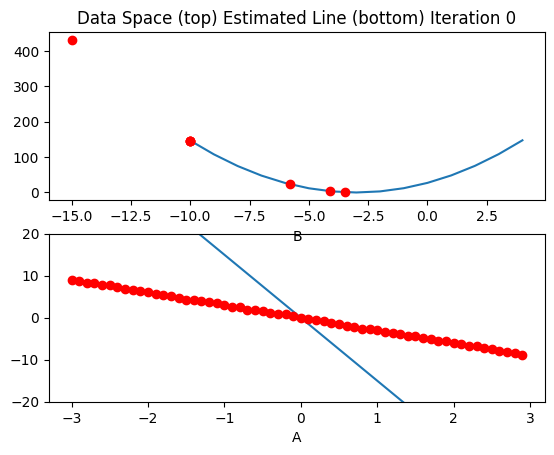

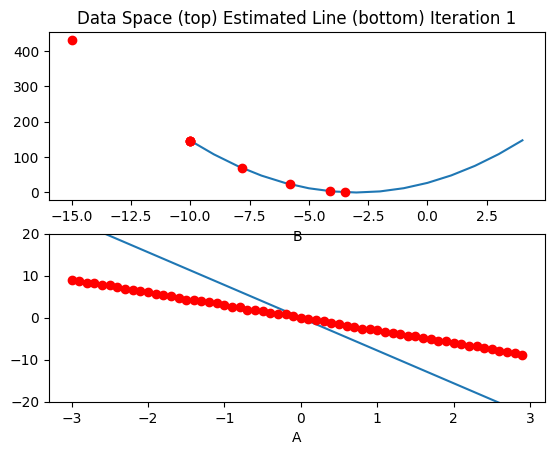

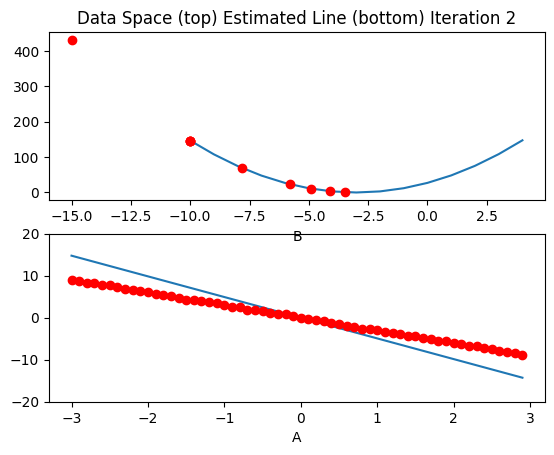

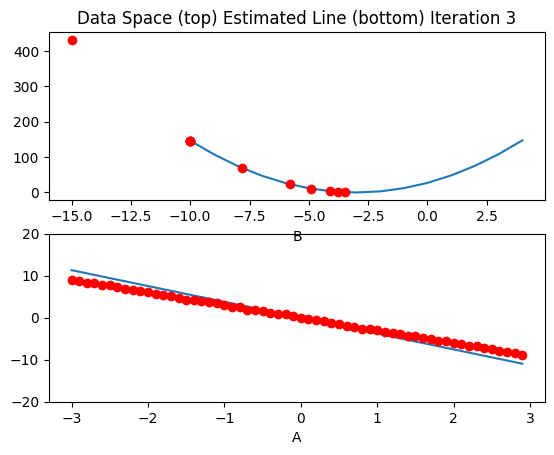

<Figure size 640x480 with 0 Axes>

In [39]:
my_train_model(4)

Plot the loss function

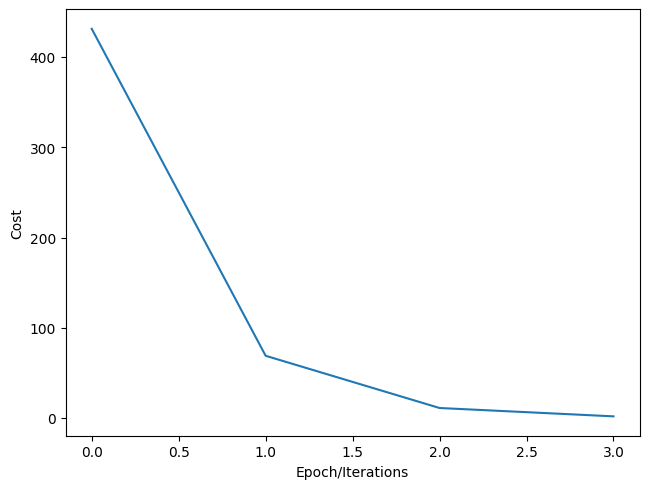

In [40]:
plt.plot(LOSS1)

plt.tight_layout()
plt.xlabel('Epoch/Iterations')
plt.ylabel('Cost')
plt.show()